In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

> # Sonsuz değerlere sahip olan hücreleri NaN ile değiştir ve eksik verileri sütun ortalaması ile doldur

In [3]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

> # Kümeleme işlemi için kullanılacak özellikler

In [4]:
X = data[['Open', 'High', 'Low', 'Volume']]

> # Verileri standartlaştırma (Z-puanı ile normalize etme)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

> # K-means kümeleme modelini oluştur ve veriyi 3 küme olacak şekilde kümeleme

In [6]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # n_init parametresini açıkça belirleyin
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [7]:
data['Cluster'] = labels

> # Veriyi örnekleyerek grafiklerde kullanmak için %10'unu seç(Veri seti boyutu çokbüyük olduğu için)

In [8]:
sampled_data = data.sample(frac=0.1, random_state=42)

> # Kümeleme sonuçlarını görselleştirme

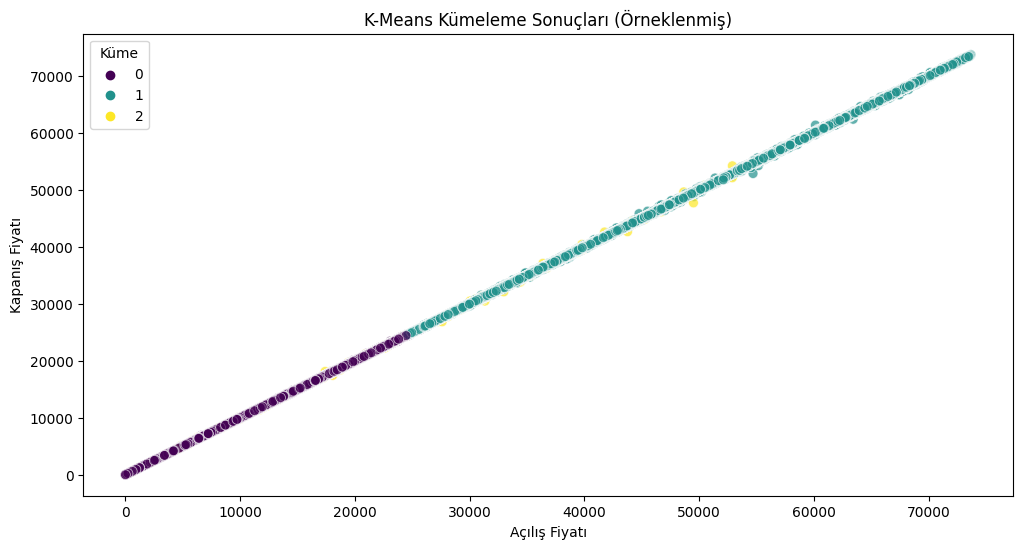

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=sampled_data['Open'], y=sampled_data['Close'], hue=sampled_data['Cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Kümeleme Sonuçları (Örneklenmiş)')
plt.xlabel('Açılış Fiyatı')
plt.ylabel('Kapanış Fiyatı')
plt.legend(title='Küme')
plt.show()

> # Küme sayısının seçimi için Dirsek Yöntemini kullandım (Inertia değerlerini hesaplama)

In [10]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

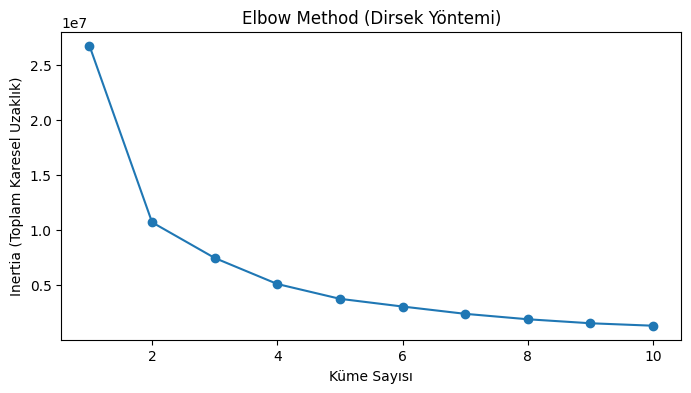

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method (Dirsek Yöntemi)')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia (Toplam Karesel Uzaklık)')
plt.show()

In [12]:
inertia_value = kmeans.inertia_
print(f'Inertia: {inertia_value:.4f}')

Inertia: 1335085.7672


In [13]:
from sklearn.metrics import silhouette_score
sampled_data = X_scaled[np.random.choice(X_scaled.shape[0], size=10000, replace=False)] 
sampled_labels = labels[np.random.choice(labels.shape[0], size=10000, replace=False)]  
silhouette_avg = silhouette_score(sampled_data, sampled_labels)
print(f'Silhouette Skoru (Örneklenmiş): {silhouette_avg:.4f}')

Silhouette Skoru (Örneklenmiş): -0.0091
